In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('time_series_covid19_deaths_US.csv')
deaths =deaths.loc[deaths['Population']!=0]

states= []
x=0
for state in confirmed.Province_State.unique():
    if(state=='Diamond Princess' ):
         x=3
    elif(state=='Puerto Rico'):
        x=2
    elif(state=='District of Columbia'):
        x
    elif( state=='Northern Mariana Islands'):
        x=3
    elif(state=='American Samoa'):
        x
    elif(state=='Virgin Islands'):
        x=4
    elif(state=='Grand Princess'):
        x
    elif(state=='Guam'):
        x=6
    else:
        states.append(state)

#confirmed.head()

In [3]:
def make_us_population():
    df = pd.DataFrame()
    df['State']= deaths['Province_State'].values
    df['County'] = deaths['Admin2'].values
    df['Population']= deaths['Population'].values
    df.to_excel('US_Counties_Population.xlsx')
    return df


In [4]:
def get_pop100k(state, county):
    pop_df = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')
    pop_df= pop_df.loc[pop_df['Country_Region']=='US']
    pop_df.rename(columns ={'Admin2':'County'} , inplace = True)
    pop_df= pop_df.loc[pop_df['Province_State']== state]
    pop_df = pop_df.loc[pop_df['County']==county]
    population = pop_df['Population'].values
    pop100k = population / 100000
    return pop100k


In [5]:
def make_state_df(df, state):
    state_df =df.loc[df['Province_State']==state]
    state_df.rename(columns={'Admin2':'County'}, inplace=True)
    
    return state_df  
   
ny_confirm = make_state_df(confirmed,'New York')
ny_death = make_state_df(deaths, 'New York')
#ny_confirm.head()

In [6]:
def make_county_confirmed (state_df, county):
    county_df =state_df.loc[state_df['County']==county]
    county_df= county_df.iloc[:,11:]
    
    return county_df

def make_county_deaths (state_deaths, county):
    county_df =state_deaths.loc[state_deaths['County']==county]
    county_df= county_df.iloc[:,12:]
    

   
    #population =county_pop['Population'].value
    
    # county_pop, population
    return county_df
def county_population(state_deaths, county):
    county_df =state_deaths.loc[state_deaths['County']==county]
    
    county_pop= county_df['Population'].values   
    return county_pop
#county_df = make_county_confir

NameError: name 'make_county' is not defined

In [7]:
def make_new_cases(county_df):
    county_values = county_df.T.values
    
    ei = county_df.T.index.values
    ei
    x=0
    new_cases=[]
    for case in county_values:
        if(x==0):
            new_cases.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_cases)
            nc= case - current
            if(case > current):
                    
                    new_cases.append(nc)
            else:
                new_cases.append(0)
           
            y=y+1
    return new_cases
    
         


In [8]:
def make_rolling_average(df):    
    days_1ago= df['New_Cases'].shift(1).fillna(method='backfill')
    days_2ago = df['New_Cases'].shift(2).fillna(method='backfill')
    days_3ago = df['New_Cases'].shift(3).fillna(method='backfill')
    days_4ago = df['New_Cases'].shift(4).fillna(method='backfill')
    days_5ago = df['New_Cases'].shift(5).fillna(method='backfill')
    today = df['New_Cases']

    df['Average'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    return df['Average']


In [38]:
def make_rolling_death(df):    
    days_1ago= df['New_Deaths'].shift(1).fillna(method='backfill')
    days_2ago = df['New_Deaths'].shift(2).fillna(method='backfill')
    days_3ago = df['New_Deaths'].shift(3).fillna(method='backfill')
    days_4ago = df['New_Deaths'].shift(4).fillna(method='backfill')
    days_5ago = df['New_Deaths'].shift(5).fillna(method='backfill')
    today = df['New_Deaths']

    df['Average_Deaths'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    return df['Average_Deaths']


In [10]:
def past_2_weeks(df):
    today = df['New_Cases']
    days_1ago= df['New_Cases'].shift(1).fillna(method='backfill')
    days_2ago = df['New_Cases'].shift(2).fillna(method='backfill')
    days_3ago = df['New_Cases'].shift(3).fillna(method='backfill')
    days_4ago = df['New_Cases'].shift(4).fillna(method='backfill')
    days_5ago = df['New_Cases'].shift(5).fillna(method='backfill')
    days_6ago= df['New_Cases'].shift(6).fillna(method='backfill')
    days_7ago = df['New_Cases'].shift(7).fillna(method='backfill')
    days_8ago = df['New_Cases'].shift(8).fillna(method='backfill')
    days_9ago = df['New_Cases'].shift(9).fillna(method='backfill')
    days_10ago = df['New_Cases'].shift(10).fillna(method='backfill')
    days_11ago= df['New_Cases'].shift(11).fillna(method='backfill')
    days_12ago = df['New_Cases'].shift(12).fillna(method='backfill')
    days_13ago = df['New_Cases'].shift(13).fillna(method='backfill')
    df['New_Cases_2wks']= today + days_1ago +days_2ago +days_3ago+ days_4ago +days_5ago + days_6ago+ days_7ago +days_8ago+ days_9ago +days_10ago+days_11ago+days_12ago+days_13ago
    return df['New_Cases_2wks']

In [73]:

def join_tables(confirmed_df, death_df, daily_confirms, daily_deaths, county_pop):
    confirmed_df.index.name ='Confirmed'
    death_df.index.name = 'Deaths'
    
    c_trans = confirmed_df.T
    
    d_trans = death_df.T
   
    c_trans.index.name = 'Date'
    d_trans.index.name = 'Date'
   
    onehundredk = float(county_pop / 100000)
    death25k = float(county_pop/ 25000)
    joined_df = c_trans.join(d_trans,lsuffix='Date', rsuffix='Date')
    joined_df['Confirmed']= c_trans.values
    joined_df['Confirmed_per_100k']=joined_df['Confirmed']/ onehundredk
    joined_df['Deaths']= d_trans.values
    joined_df['Deaths_Per_25k']=joined_df['Deaths']/death25k
    joined_df['New_Cases']=daily_confirms
    joined_df['New_Deaths']= daily_deaths
    joined_df['Population_Affected']=  joined_df['Confirmed'] / county_pop
    joined_df['Average']= make_rolling_average(joined_df)
    joined_df['Average_Deaths']= make_rolling_death(joined_df)
    #joined_df.drop(['1914Date'],axis=1, inplace=True)
    onehundredk = float(county_pop / 100000)
    death25k = float(county_pop/ 25000)
    joined_df['Ave_per_100k'] = joined_df['Average']/ onehundredk
    
    joined_df['New_Cases_2wks'] = past_2_weeks(joined_df)
    joined_df['NC_2wks_per_100k'] = joined_df['New_Cases_2wks'] / onehundredk
    joined_df = joined_df.iloc[:, 2:]
    
    return joined_df


In [82]:
def id_columns (join_df, County , State):
    join_df['County']= County
    join_df['State'] = State 
    join_df['New_Cases']= join_df['New_Cases'].astype(int)
    join_df['New_Deaths'] = join_df['New_Deaths'].astype(int)
    join_df['Population_Affected']= join_df['Population_Affected'].round(5)
    join_df['Average'] = join_df['Average'].astype(int)
    join_df['Average_Deaths']= join_df['Average_Deaths'].astype(int)
    join_df['Ave_per_100k']= join_df['Ave_per_100k'].astype(int) 
    join_df['New_Cases_2wks'] = join_df['New_Cases_2wks'].astype(int)
    join_df['NC_2wks_per_100k'] = join_df['NC_2wks_per_100k'].astype(int) 
    join_df['State']= join_df['State'].astype(str)
    join_df['County']= join_df['County'].astype(str)
    join_df['Confirmed_per_100k']=join_df['Confirmed_per_100k'].astype(int)
    
    
    return join_df


In [13]:
def one_shot(County, State):
    state_confirmed= make_state_df(confirmed, State)
    state_deaths = make_state_df(deaths, State)
    county_df = make_county_confirmed(state_confirmed, County)
    county_dd = make_county_deaths(state_deaths, County)
    daily_confirms = make_new_cases(county_df)
    daily_deaths = make_new_cases (county_dd)
    county_pop = county_population(state_deaths, County)
    join_df = join_tables(county_df, county_dd, daily_confirms, daily_deaths, county_pop)
    df = id_columns(join_df, County, State)
    return df 


In [104]:
def one_shot_6_months(County, State):
    state_confirmed= make_state_df(confirmed, State)
    state_deaths = make_state_df(deaths, State)
    county_df = make_county_confirmed(state_confirmed, County)
    county_dd = make_county_deaths(state_deaths, County)
    daily_confirms = make_new_cases(county_df)
    daily_deaths = make_new_cases (county_dd)
    county_pop = county_population(state_deaths, County)
    join_df = join_tables(county_df, county_dd, daily_confirms, daily_deaths, county_pop)
    df = id_columns(join_df, County, State)
    n= df.shape[0]-180
    df = df.iloc[n:,:]
    return df 

In [106]:
erie = one_shot_6_months('Erie' , 'New York')
erie.head()

,Confirmed,Confirmed_per_100k,Deaths,Deaths_Per_25k,New_Cases,New_Deaths,Population_Affected,Average,Average_Deaths,Ave_per_100k,New_Cases_2wks,NC_2wks_per_100k,County,State
Date,,,,,,,,,,,,,,
7/1/20,7337,798,634,17.252602,45,0,0.00799,31,0,3,455,49,Erie,New York
7/2/20,7370,802,634,17.252602,33,0,0.00802,32,0,3,450,48,Erie,New York
7/3/20,7427,808,639,17.388664,57,5,0.00808,39,1,4,472,51,Erie,New York
7/4/20,7462,812,639,17.388664,35,0,0.00812,42,1,4,482,52,Erie,New York
7/5/20,7475,813,639,17.388664,13,0,0.00814,36,1,3,471,51,Erie,New York


In [107]:
def make_all_counties(df , State):
    df= df.loc[df['Province_State']== State]
    counties = df['Admin2'].unique()
    new_rows = []
    new_counties = []
    df.rename(columns={'Admin2': 'County'} , inplace = True)

    for county in counties:
        x= get_pop100k(State, county)
        if(x > 0):
            new_counties.append(county)
            #print(county, x)
        else:
            x=0
            x=0
    x=0
    for county in new_counties:
        
        if(x==0):   
            
            df2= one_shot_6_months(county , State)
            columns=df2.columns
            df2['County']=  county
            df = pd.DataFrame(columns = columns)
            #last_row_number = df2.shape[0] -1 
            #df  = df2.iloc[last_row_number:,:]
            df = df2
            #print(last_row)
            x=x+1
        
        elif(x<3):
          
            df2= one_shot_6_months(county , State)
            #last_row_number = df2.shape[0] -1
            #df2 = df2.iloc[last_row_number:,:]
            df = pd.concat([df, df2])
            
    
    return df



In [108]:
def make_region(list_of_states):
    x= 0
    for state in list_of_states:
        if(x==0):
            x= x+1
            df = make_all_counties(confirmed , state)
            df.reset_index(inplace = True)
         
        else:
            print(state)
            df1 =make_all_counties(confirmed , state)
            df1.reset_index(inplace = True)
            df = pd.concat([df, df1], ignore_index = True)
    
    return df



In [109]:
northeast = ['Connecticut','Delaware', 'Maine', 'Maryland', 'New Hampshire'] 
pompous =['New Jersey', 'New York', 'Pennsylvania','Rhode Island', 'Vermont']

south = ['Alabama','Florida',  'Georgia','Kentucky' ,'Louisiana','Mississippi',
         'North Carolina','South Carolina','Tennessee', 'Virginia',]

midwest = ['Illinois', 'Indiana','Michigan', 'Minnesota','Ohio','Missouri','West Virginia',  'Wisconsin']

central = [ 'Arkansas', 'Nebraska','North Dakota', 'Oklahoma','Iowa' ,'Kansas',  'South Dakota']

mountains = ['Colorado','Idaho', 'Montana', 'Wyoming']

south_west = ['Arizona','Nevada', 'New Mexico' ,'Texas' ]

west = ['California',  'Oregon', 'Washington']

non_continental = ['Alaska','Hawaii']



In [110]:
def mass_state():
    mass =deaths.loc[deaths['Province_State']=='Massachusetts']
    mass_counties = mass['Admin2']
    x=0
    for county in mass_counties:
        if(x==0):
            x=x+1
            df = one_shot_6_months(county, 'Massachusetts')
            df.reset_index(inplace = True)
        else:
            df1 = one_shot_6_months(county,'Massachusetts')
            df1.reset_index(inplace = True)
            df = pd.concat([df,df1], ignore_index = True)
        
    return df

mass = mass_state()

In [111]:
def utah_state():
    mass =deaths.loc[deaths['Province_State']=='Utah']
    mass_counties = mass['Admin2']
    x=0
    for county in mass_counties:
        if(x==0):
            x=x+1
            df = one_shot_6_months(county, 'Utah')
            df.reset_index(inplace = True)
        else:
            df1 = one_shot_6_months(county,'Utah')
            df1.reset_index(inplace = True)
            df = pd.concat([df,df1], ignore_index = True)
        
    return df

ut = utah_state()
    

In [112]:
n_east = make_region(pompous)
n_east1 = make_region(northeast)
n_east3 = pd.concat([n_east, n_east1, mass], ignore_index= True)



New York
Pennsylvania
Rhode Island
Vermont
Delaware
Maine
Maryland
New Hampshire


In [113]:
the_south = make_region(south)

Florida
Georgia
Kentucky
Louisiana
Mississippi
North Carolina
South Carolina
Tennessee
Virginia


In [114]:
mid_w = make_region(midwest)

Indiana
Michigan
Minnesota
Ohio
Missouri
West Virginia
Wisconsin


In [115]:
non_cont = make_region(non_continental)
cent = make_region(central)

Hawaii
Nebraska
North Dakota
Oklahoma
Iowa
Kansas
South Dakota


In [116]:
sw = make_region(south_west)
southwest = pd.concat([sw, ut], ignore_index = True)

Nevada
New Mexico
Texas


In [117]:
monts = make_region(mountains)
wesly= make_region(west)

Idaho
Montana
Wyoming
Oregon
Washington


In [118]:
us_counties_covid_19 = pd.concat([wesly, monts, southwest, non_cont, cent, mid_w, the_south, n_east3], ignore_index = True)
print(us_counties_covid_19.shape)
print(len(us_counties_covid_19['State'].unique()))
us_counties_covid_19.head()

(565200, 15)
50


,Date,Confirmed,Confirmed_per_100k,Deaths,Deaths_Per_25k,New_Cases,New_Deaths,Population_Affected,Average,Average_Deaths,Ave_per_100k,New_Cases_2wks,NC_2wks_per_100k,County,State
0,7/1/20,6156,368,136,2.034309,192,1,0.00368,132,1,7,1623,97,Alameda,California
1,7/2/20,6384,381,138,2.064226,228,2,0.00382,178,1,10,1746,104,Alameda,California
2,7/3/20,6472,387,140,2.094142,88,2,0.00387,160,1,9,1770,105,Alameda,California
3,7/4/20,6556,392,140,2.094142,84,0,0.00392,158,1,9,1632,97,Alameda,California
4,7/5/20,6855,410,140,2.094142,299,0,0.00410,178,1,10,1931,115,Alameda,California


In [119]:
us_counties_covid_19.to_excel('US_Covid-19.xlsx')

In [25]:
erie =one_shot('Erie', 'New York')
la =one_shot("Los Angeles", "California",)
nyc =one_shot('New York', 'New York')
gas = one_shot('Gaston' , 'North Carolina')
tus =one_shot("Pima", "Arizona")
fargo= one_shot('Cass', 'North Dakota')
port = one_shot('Multnomah', 'Oregon')
den= one_shot('Denver', 'Colorado')

<Figure size 576x432 with 0 Axes>

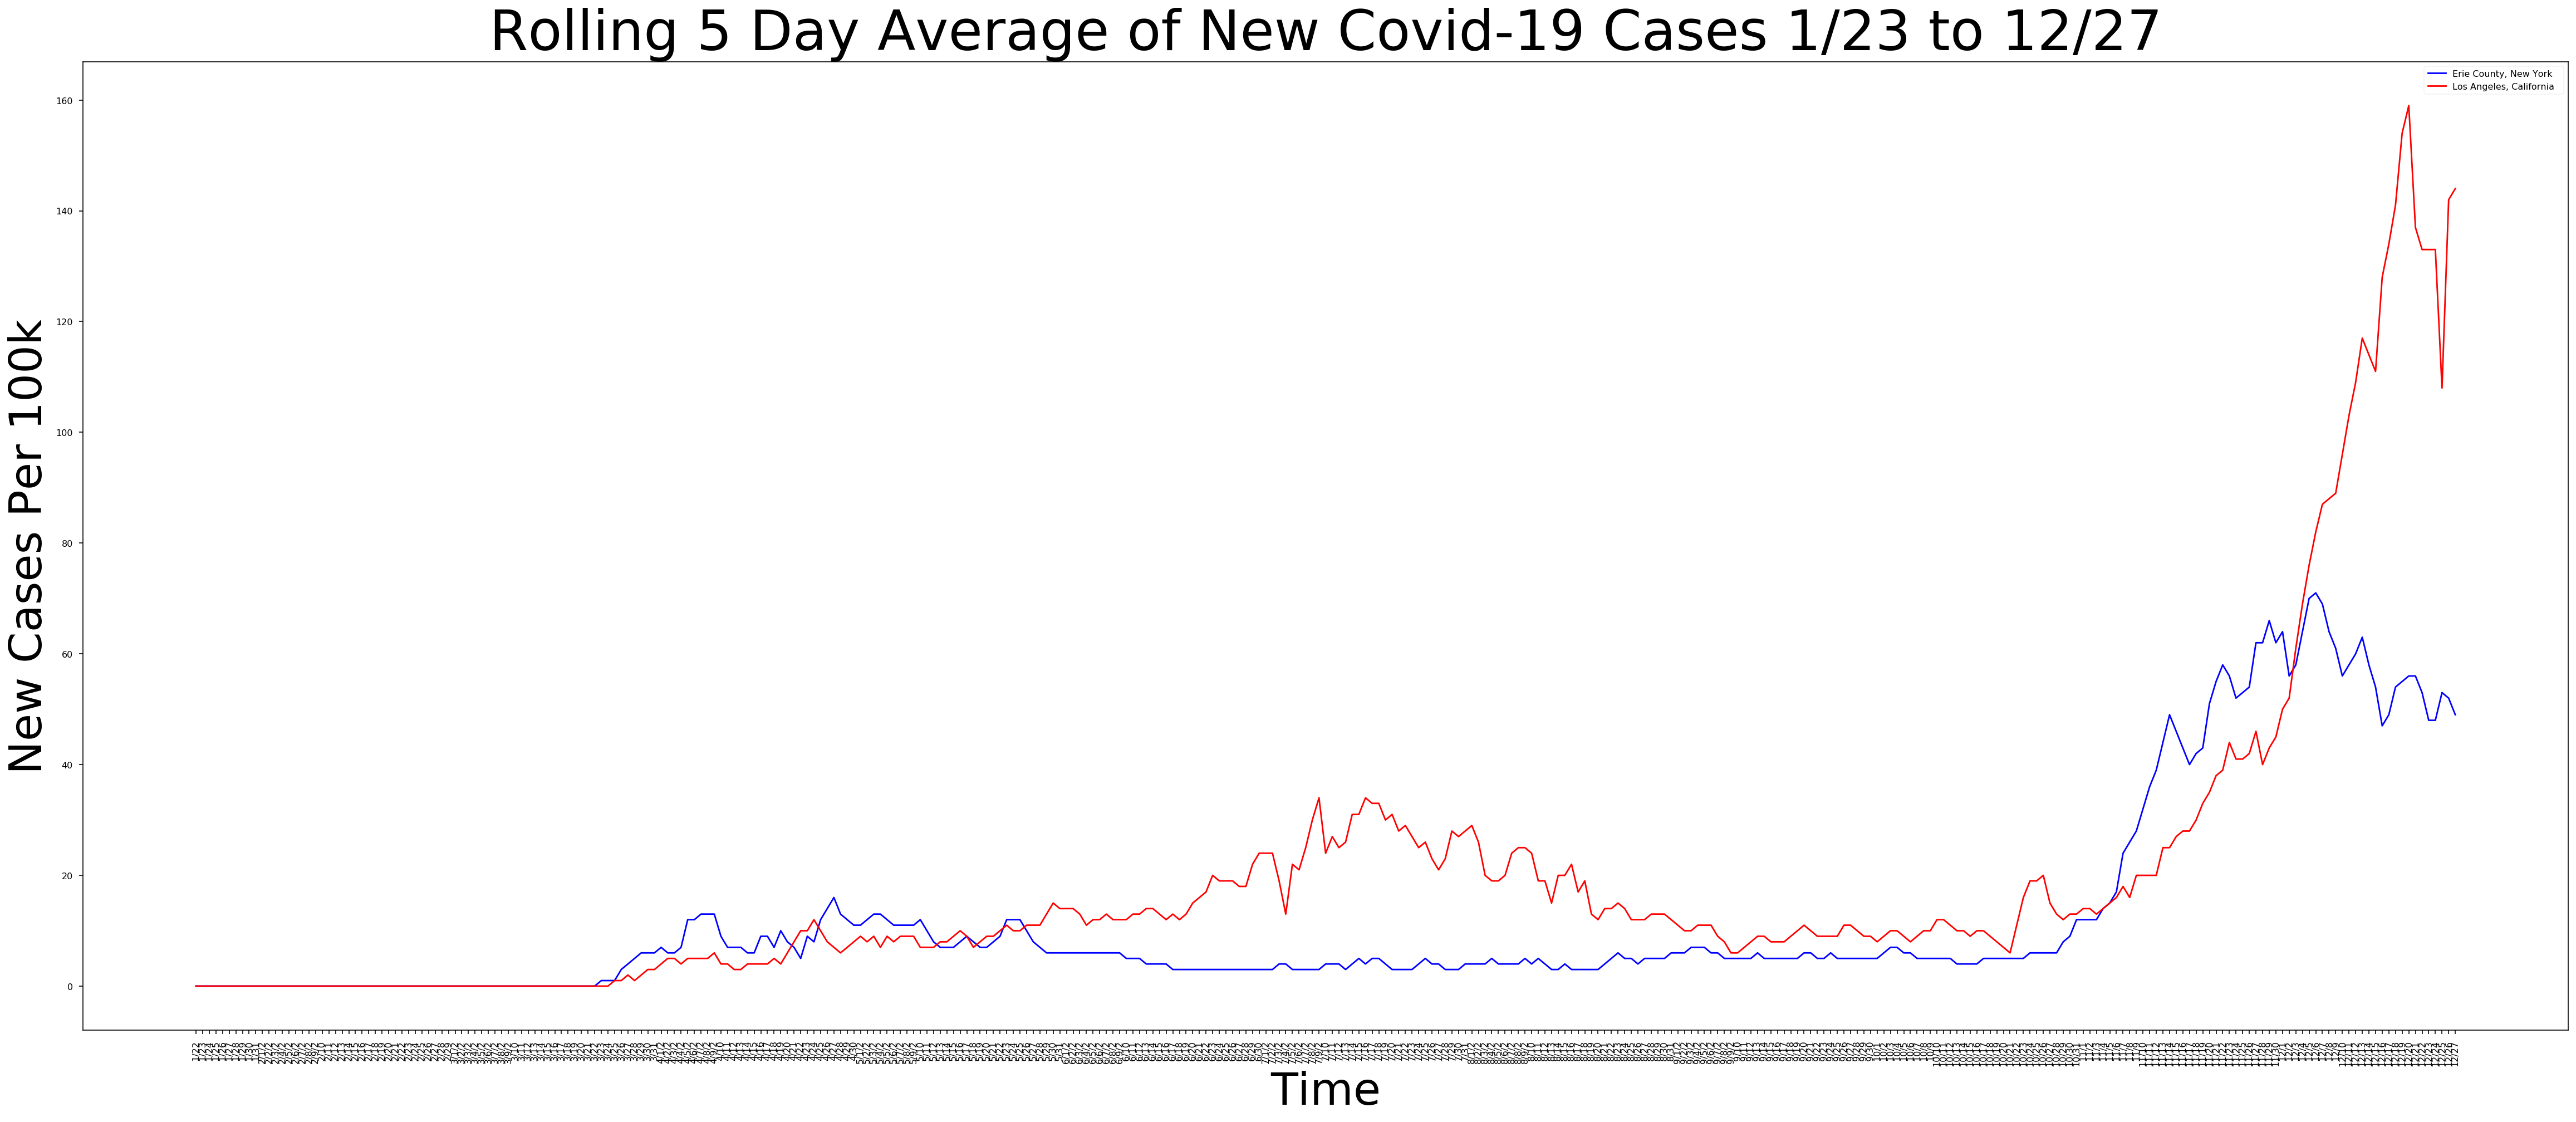

In [16]:
def  graph_rolling_average (df,df1_Name,  df2, df2_Name):
    date_series = df.index
    date_averages = df['Ave_per_100k'].values
    
    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]

            date_values.append(date)
    
    date_series2 = df2.index
    date_averages2 = df2['Ave_per_100k'].values
    
    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]
            date_values.append(date)
    
    
    fig = plt.figure(figsize=(8,6))
    plt.style.use('seaborn-paper')
    plt.figure(figsize=(40,16))
    plt.plot(date_values, date_averages, 'b', label=df1_Name)
    plt.plot(date_values, date_averages2, 'r', label = df2_Name)

    plt.ylabel('New Cases Per 100k',  fontsize=40)
    plt.xlabel('Time', fontsize=40)
    plt.xticks(rotation=90)
    x =len(date_values)-1
    y = str(date_values[x])
    
    title ='Rolling 5 Day Average of New Covid-19 Cases 1/23 to ' + y
    plt.title(title, fontsize=50)
    plt.legend()
    plt.show()
    return
df = one_shot('Erie', 'New York')
df2 = one_shot('Los Angeles' , 'California')

#graph_rolling_average(df,'Erie County', df2, 'Los Angeles')
graph_rolling_average(df,'Erie County, New York', df2, 'Los Angeles, California  ')





<Figure size 576x432 with 0 Axes>

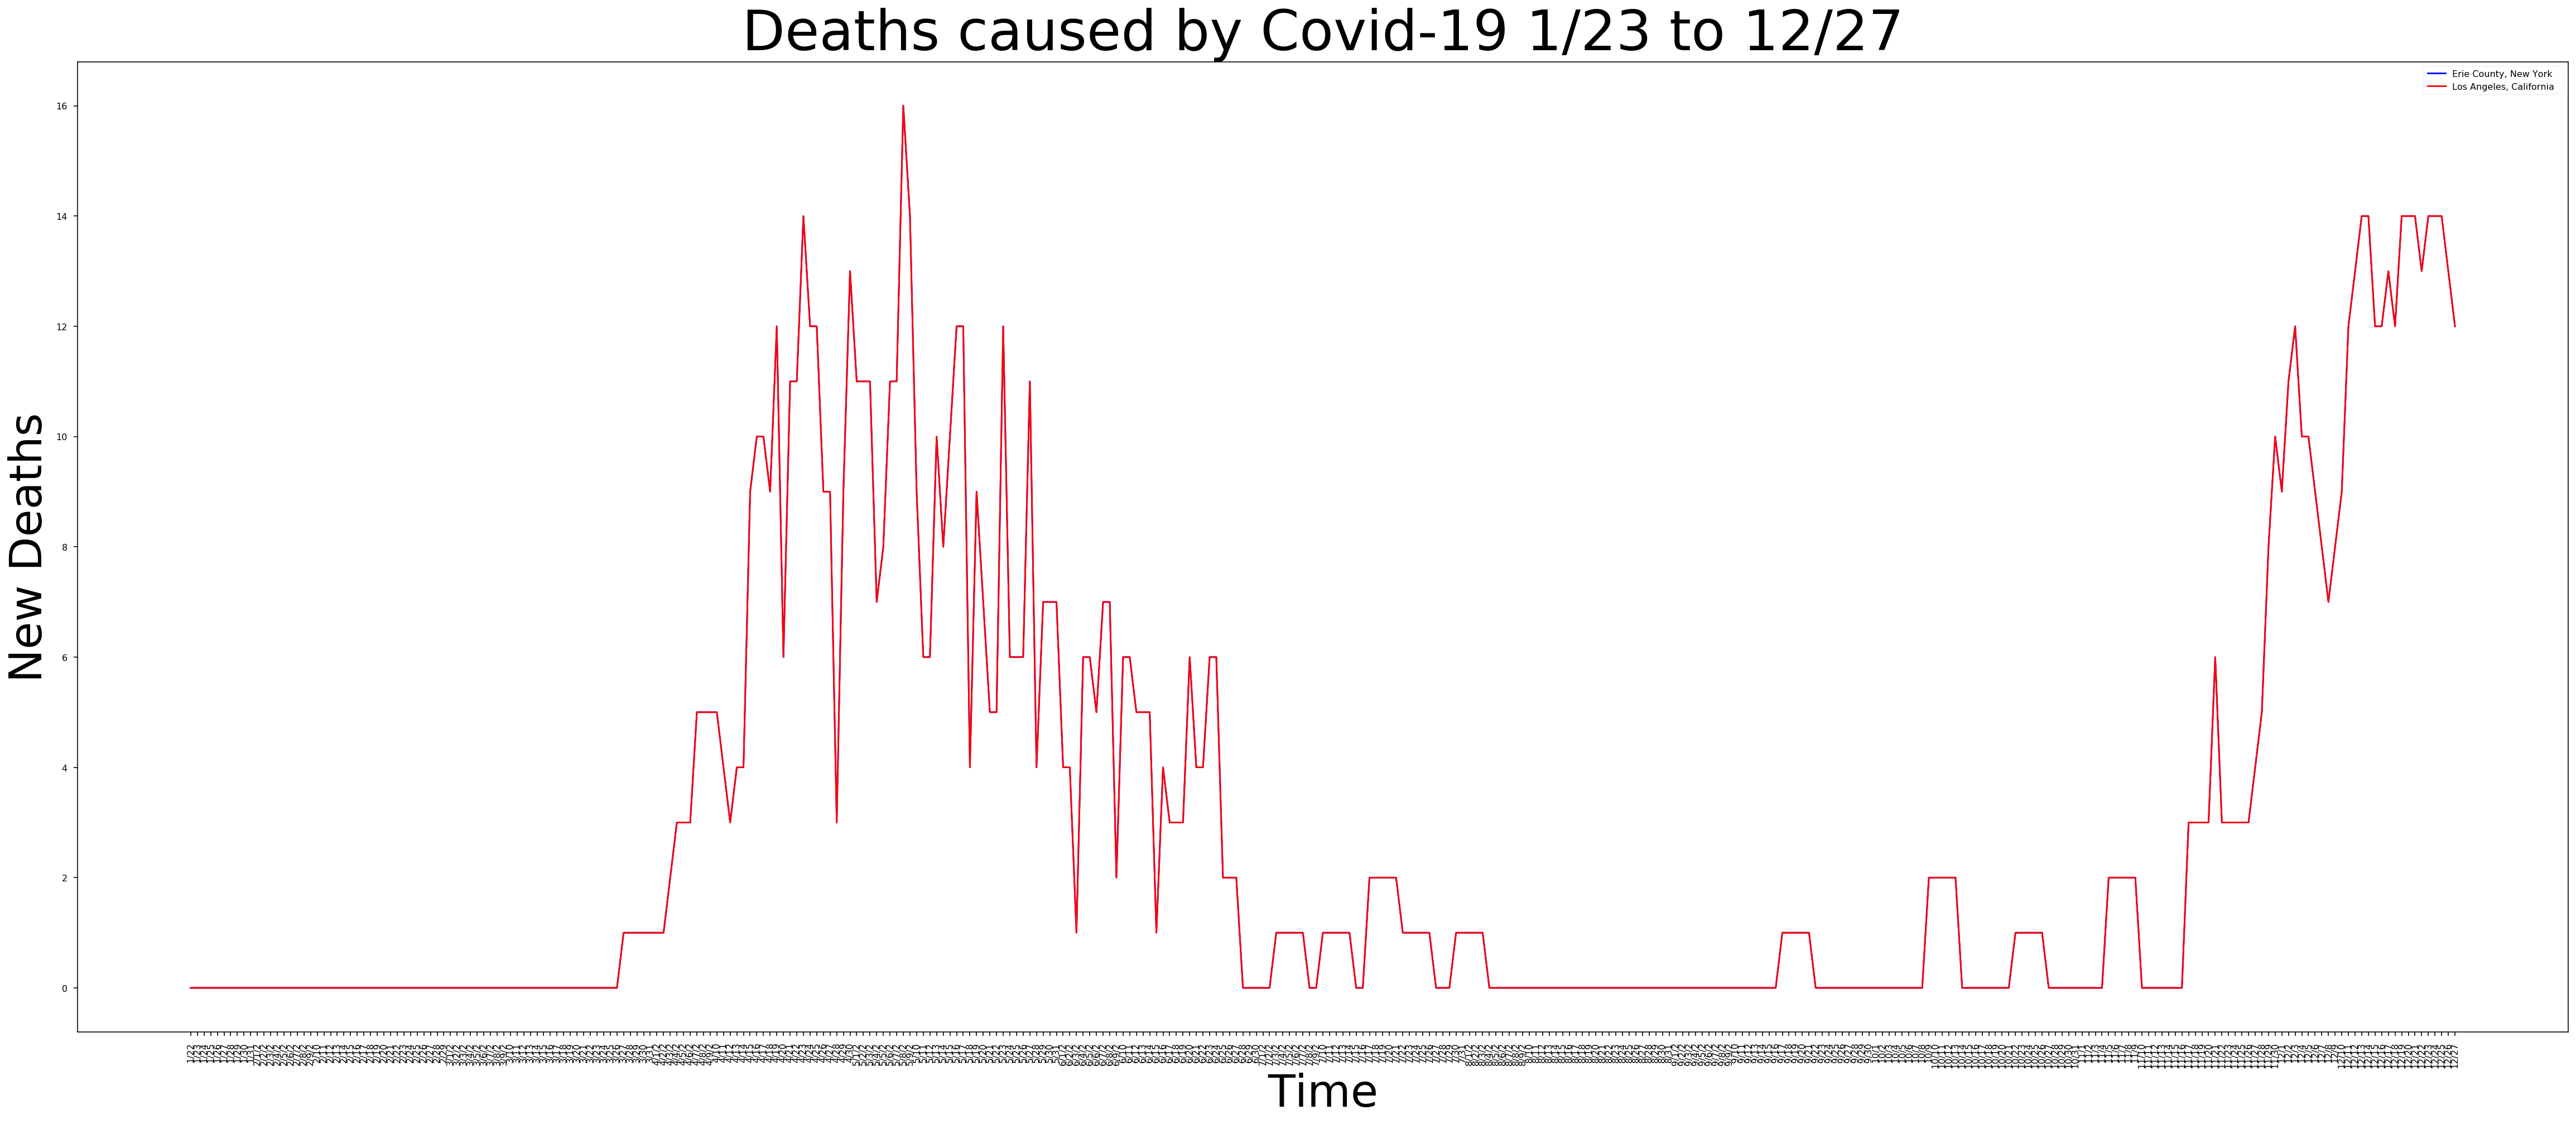

In [72]:
def  graph_average_deaths (df,df1_Name,  df2, df2_Name):
    date_series = df.index
    date_averages = df['Average_Deaths'].values
    
    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]

            date_values.append(date)
    
    date_series2 = df2.index
    date_averages2 = df2['Average_Deaths'].values
    
    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]
            date_values.append(date)
    
    
    fig = plt.figure(figsize=(8,6))
    plt.style.use('seaborn-paper')
    plt.figure(figsize=(40,16))
    plt.plot(date_values, date_averages, 'b', label=df1_Name)
    plt.plot(date_values, date_averages2, 'r', label = df2_Name)

    plt.ylabel('New Deaths',  fontsize=40)
    plt.xlabel('Time', fontsize=40)
    plt.xticks(rotation=90)
    x =len(date_values)-1
    y = str(date_values[x])
    
    title ='Deaths caused by Covid-19 1/23 to ' + y
    plt.title(title, fontsize=50)
    plt.legend()
    plt.show()
    return
df = one_shot('Erie', 'New York')
df2 = one_shot('Los Angeles' , 'California')

#graph_rolling_average(df,'Erie County', df2, 'Los Angeles')
graph_average_deaths(df,'Erie County, New York', df, 'Los Angeles, California  ')






Osceola County, Florida 45 days prior to 12/27


<Figure size 576x432 with 0 Axes>

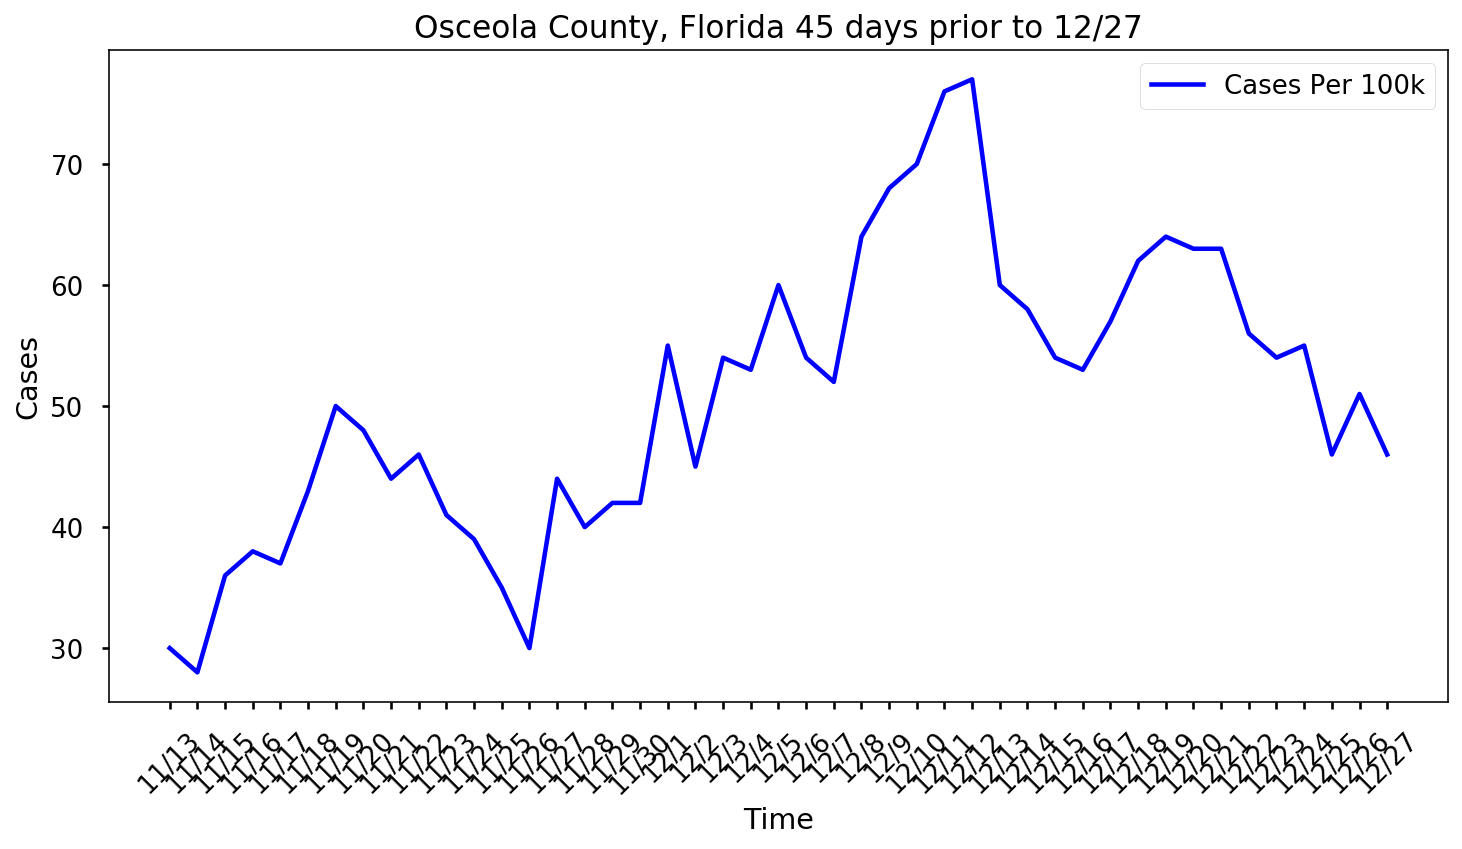

In [152]:

def graph_n_days_ago(County, State , n):
    df = one_shot(County, State)
    N= df.shape[0] - n
    df= df.iloc[N:, :]
    
    
    date_series = df.index
    date_averages = df['Ave_per_100k'].values

    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]

            date_values.append(date)
    #print(date_values)
    x =len(date_values)-1
    plt.style.use('seaborn-talk')
    fig = plt.figure(figsize=(8,6))
    y = str(date_values[x])
    n = str(n)
    title = County + " County, " + State +" "+ n +" days prior to " + y
    print(title)

    plt.figure(figsize=(12,6))
    plt.plot(date_values, date_averages, 'b', label='Cases Per 100k')

    plt.ylabel('Cases')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.legend()
    plt.show()
    return
graph_n_days_ago('Osceola','Florida' , 45)

Erie County, New York 55 days prior to 12/27


<Figure size 576x432 with 0 Axes>

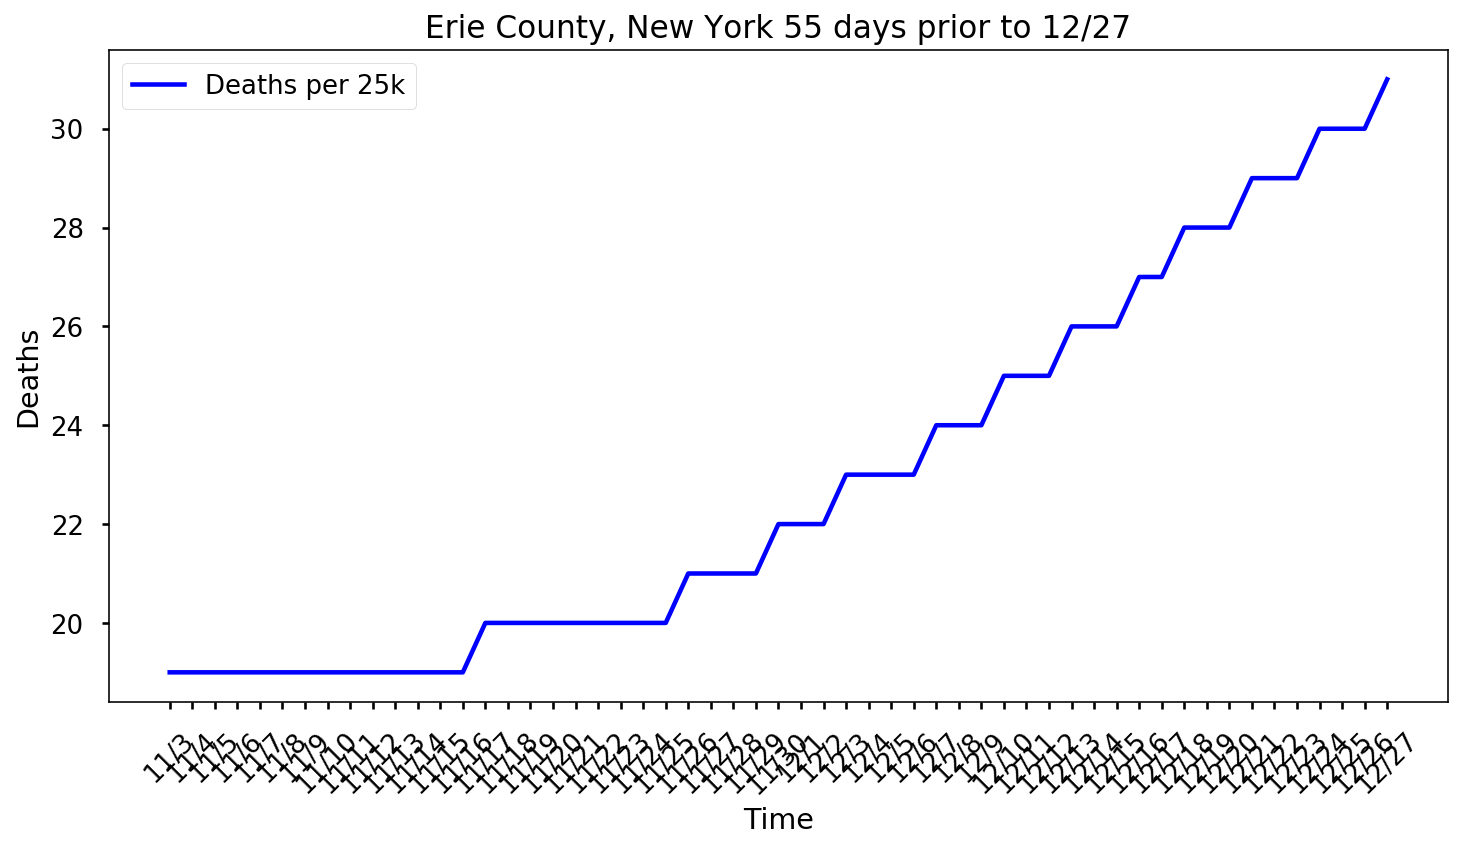

In [33]:

def graph_deaths_n_days_ago(County, State , n):
    df = one_shot(County, State)
    N= df.shape[0] - n
    df= df.iloc[N:, :]
    
    
    date_series = df.index
    date_averages = df['Deaths_per_25k'].values

    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]

            date_values.append(date)
    #print(date_values)
    x =len(date_values)-1
    plt.style.use('seaborn-talk')
    fig = plt.figure(figsize=(8,6))
    y = str(date_values[x])
    n = str(n)
    title = County + " County, " + State +" "+ n +" days prior to " + y
    print(title)

    plt.figure(figsize=(12,6))
    plt.plot(date_values, date_averages, 'b', label='Deaths per 25k')

    plt.ylabel('Deaths')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.legend()
    plt.show()
    return
graph_deaths_n_days_ago('Erie','New York' , 55)

Erie County vs Gaston County  32 days prior to 12/19


<Figure size 576x432 with 0 Axes>

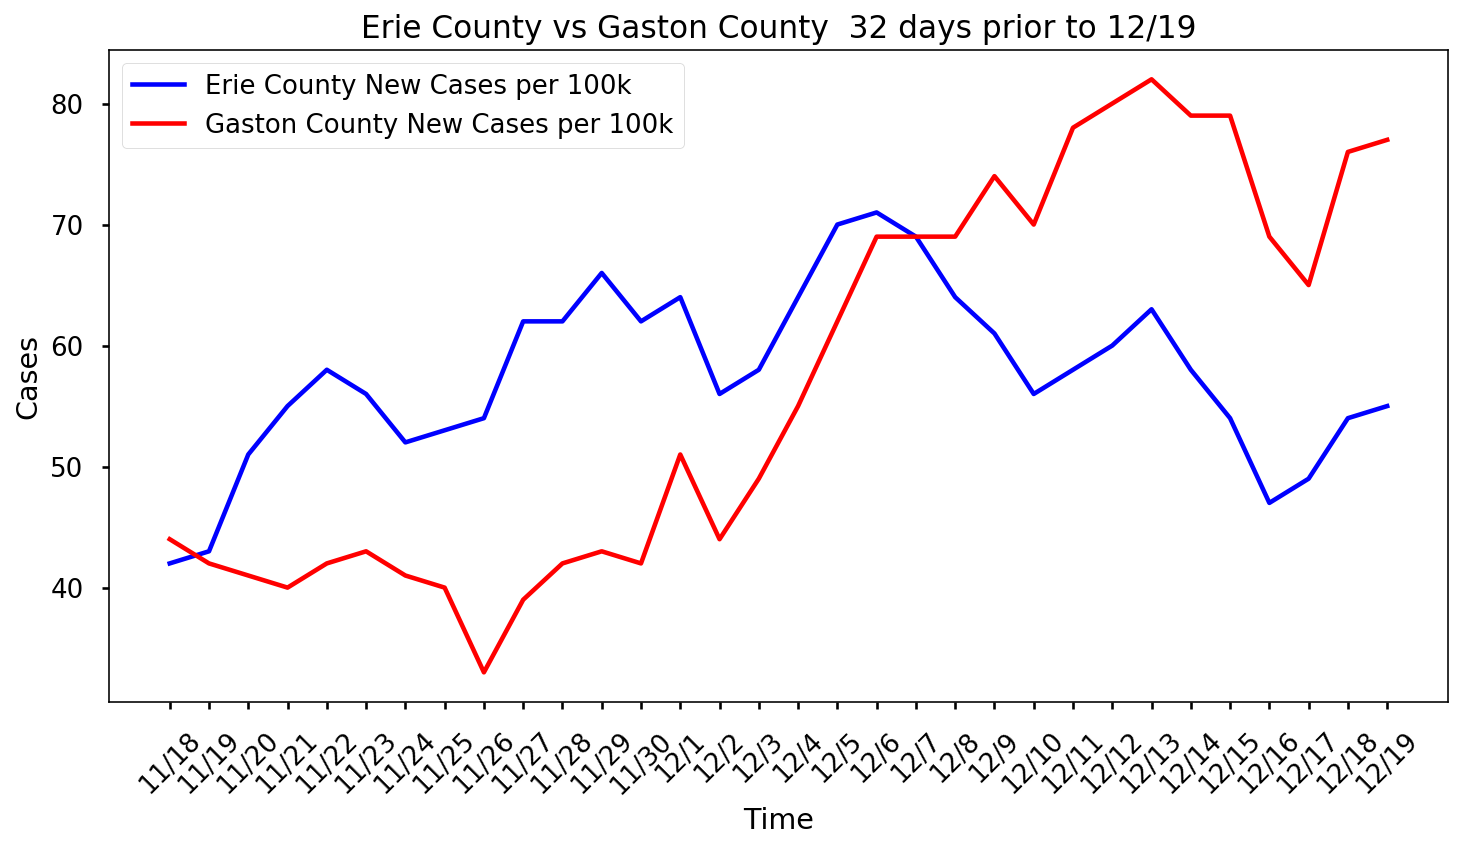

In [28]:
def Compare_Counties_n_days_ago(County, State , County2, State2, n):
    df = one_shot(County, State)
    df2 = one_shot(County2, State2)
    N= df.shape[0] - n
    N= df2.shape[0] - n
    
    df= df.iloc[N:, :]   
    date_series = df.index
    date_averages = df['Ave_per_100k'].values

    
   
    df2= df2.iloc[N:, :]   
    date_series2 = df2.index
    date_averages2 = df2['Ave_per_100k'].values
    
    date_values=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values.append(date)
        else:
            date= dates[0:5]

            date_values.append(date)
    date_values2=[]
    for dates in date_series:
        if(len(dates)==7):
            date = dates[0:4]
            date_values2.append(date)
        else:
            date= dates[0:5]

            date_values2.append(date)
    #print(date_values)
    x =len(date_values)-1
    plt.style.use('seaborn-talk')
    fig = plt.figure(figsize=(8,6))
    y = str(date_values[x])
    n = str(n)
    title = County + " County vs " +County2 +" County  "+ n +" days prior to " + y
    print(title)
    label1 = County + " County New Cases per 100k"
    label2 = County2 + " County New Cases per 100k"
    plt.figure(figsize=(12,6))
    plt.plot(date_values, date_averages, 'b', label=label1)
    plt.plot(date_values2, date_averages2, 'r', label=label2)

    plt.ylabel('Cases')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.legend()
    plt.show()
    return
Compare_Counties_n_days_ago("Erie", "New York" , "Gaston", "North Carolina", 32)

Erie County vs Gaston County  120 days prior to 12/19


<Figure size 576x432 with 0 Axes>

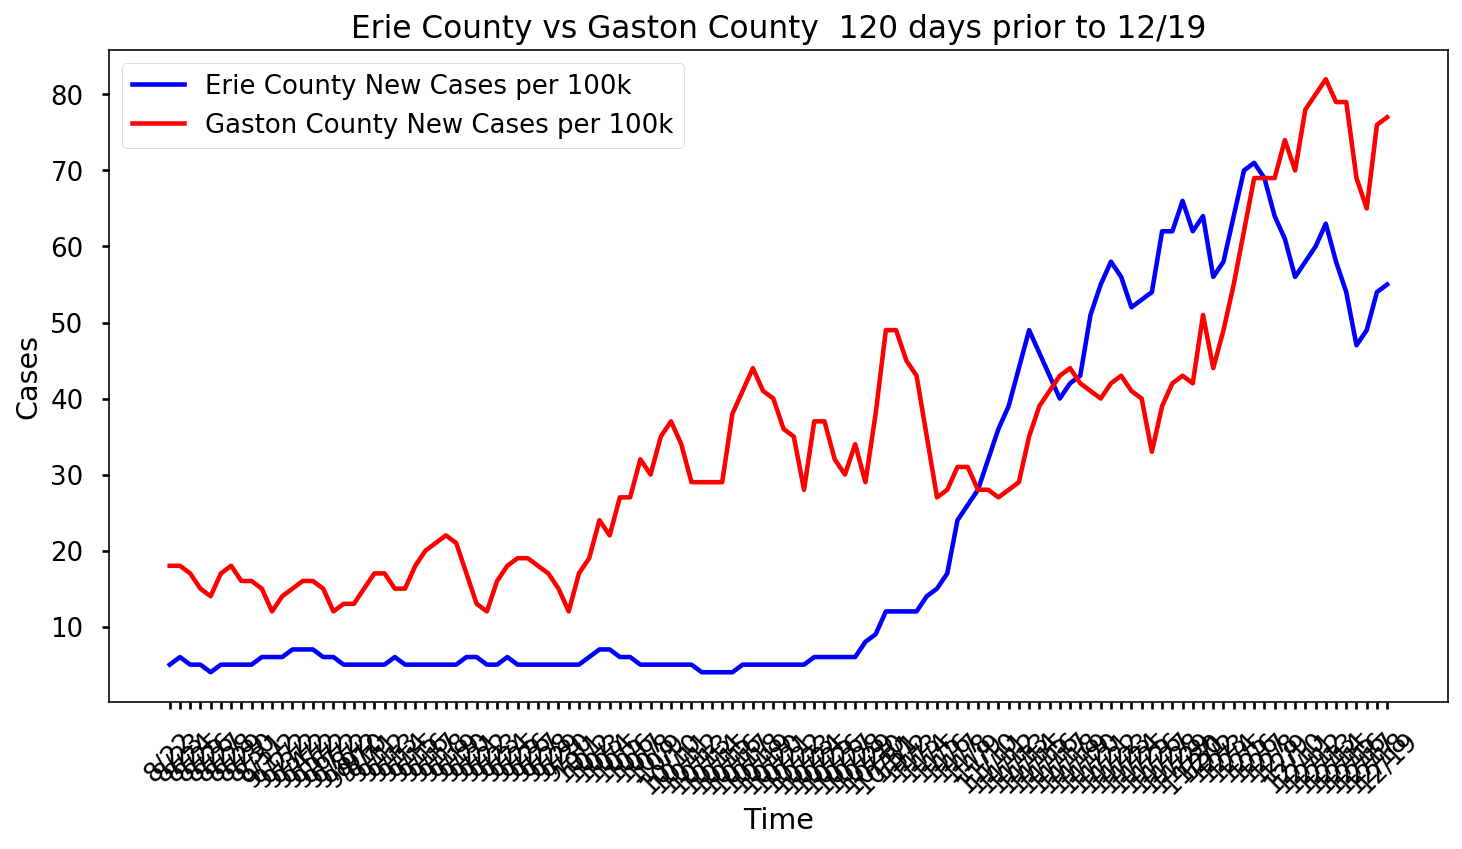

In [29]:
Compare_Counties_n_days_ago("Erie", "New York" , "Gaston", "North Carolina", 120)

Erie County vs Orange County  14 days prior to 12/19


<Figure size 576x432 with 0 Axes>

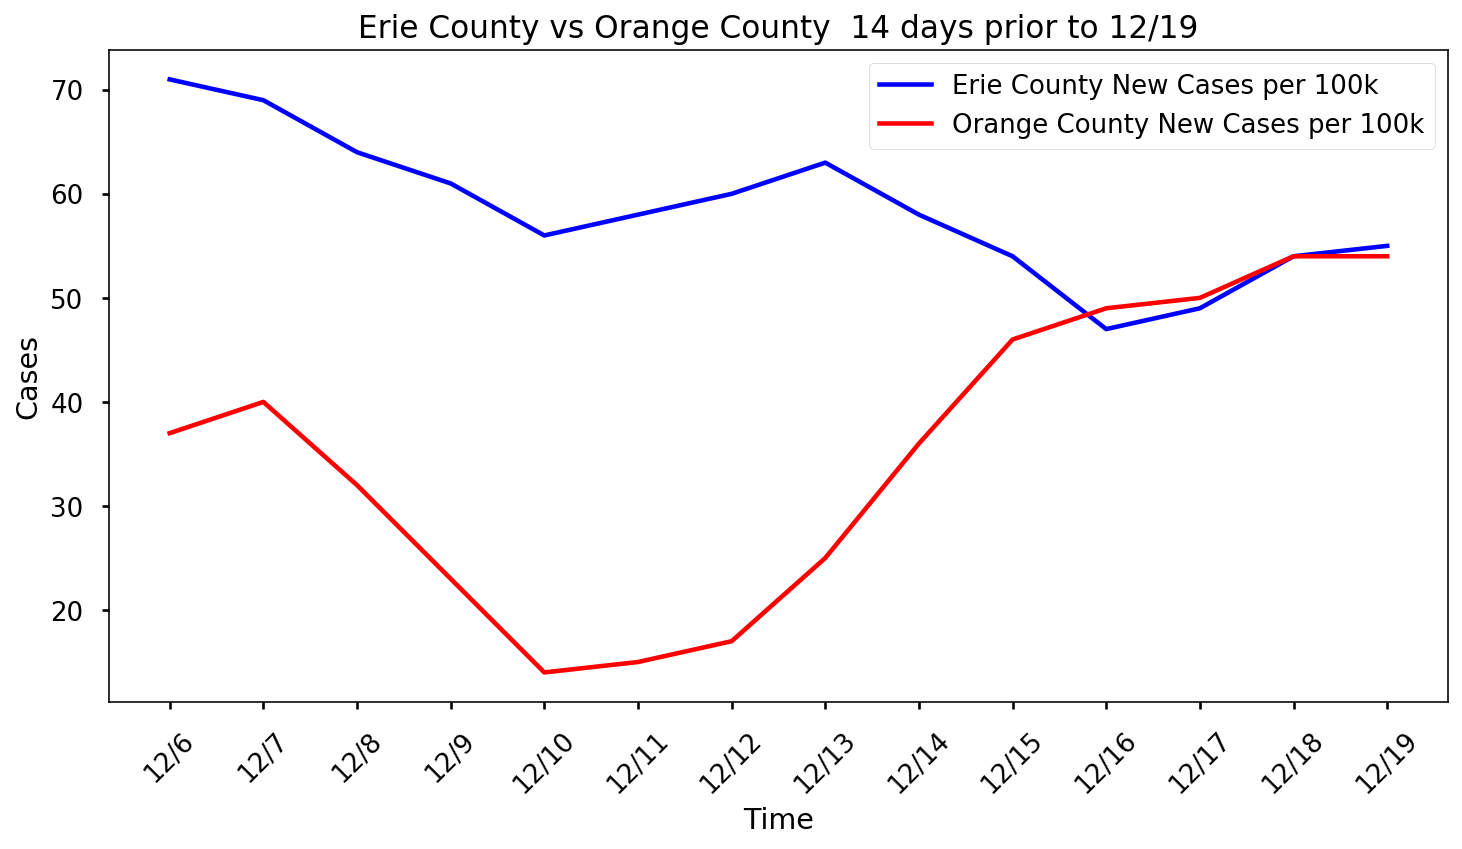

In [19]:
Compare_Counties_n_days_ago("Erie", "New York" , "Orange", "Florida", 14)

In [31]:
nyd = make_state_df(deaths, 'New York')
p = nyd.Population
county_names = []
for i in p:
    if(i>0):
        county_names.append(i)
        
    else:
        y =0
len(county_names)

62

In [52]:
erie.tail(10)

,Confirmed,Deaths,New_Cases,New_Deaths,Population_Affected,Average,Ave_per_100k,New_Cases_2wks,NC_2wks_per_100k,County,State
Date,,,,,,,,,,,
12/4/20,27903,859,793,6,0.03037,592,64,7800,849,Erie,New York
12/5/20,28681,870,778,11,0.03122,650,70,8127,884,Erie,New York
12/6/20,29337,872,656,2,0.03193,659,71,8262,899,Erie,New York
12/7/20,29720,883,383,11,0.03235,640,69,8148,886,Erie,New York
12/8/20,30073,891,353,8,0.03273,592,64,8200,892,Erie,New York
12/9/20,30719,903,646,12,0.03344,563,61,8161,888,Erie,New York
12/10/20,31282,919,563,16,0.03405,520,56,8211,893,Erie,New York
12/11/20,32015,935,733,16,0.03485,535,58,8082,879,Erie,New York
12/12/20,32489,948,474,13,0.03536,553,60,8049,876,Erie,New York


In [53]:
fl = make_state_df(confirmed, 'Florida')
flor = fl.loc[fl['County']=='Orange']
orange = one_shot('Orange', 'Florida')
orange.tail(20)

,Confirmed,Deaths,New_Cases,New_Deaths,Population_Affected,Average,Ave_per_100k,New_Cases_2wks,NC_2wks_per_100k,County,State
Date,,,,,,,,,,,
11/24/20,55526,635,479,6,0.03985,428,30,6104,438,Orange,Florida
11/25/20,55966,635,440,0,0.04016,405,29,6214,445,Orange,Florida
11/26/20,55966,635,0,0,0.04016,325,23,5831,418,Orange,Florida
11/27/20,57101,642,1135,7,0.04098,493,35,6655,477,Orange,Florida
11/28/20,57321,645,220,3,0.04114,454,32,6491,465,Orange,Florida
11/29/20,57805,645,484,0,0.04148,455,32,6230,447,Orange,Florida
11/30/20,58325,645,520,0,0.04186,471,33,6437,461,Orange,Florida
12/1/20,58862,646,537,1,0.04224,579,41,6564,471,Orange,Florida
12/2/20,59218,648,356,2,0.04250,423,30,6356,456,Orange,Florida


In [31]:
def make_state_stats(State, confirmed, deaths):
    nyc = make_state_df(confirmed, State)
    #county_names = nyc['County'].unique()
    
    #print(county_names)

    nyd = make_state_df(deaths, State)
    p = nyd.Population
    county_names = []
    for i in p:
        if(i>0):
            county_names.append(i)

        else:
            y =0
    nyd = make_state_df(deaths, State)

    population = nyd.iloc[:,11:12].sum()
    population = int(population)
    nyc = nyc.iloc[:,23:]
    nyd= nyd.iloc[:,24:]
 
    nyc_columns = nyc.columns.unique()
    

    nyd_columns =  nyd.columns.unique()
    
    state_daily = []
    s_daily_100k= []
    for column in nyc_columns:
        daily_cases = sum(nyc[column].values)
        state_daily.append(daily_cases)
        daily_100k = daily_cases / (population /100000)
        s_daily_100k.append(int(daily_100k))
    state_death = []
    s_death_100k =[]
    for column in nyd_columns:
        daily_deaths = sum(nyd[column].values)
        state_death.append(daily_deaths)
        death_100k = daily_deaths / (population /100000)
        s_death_100k.append(int(death_100k))


    x=0
    new_cases=[]
    for case in state_daily:
        if(x==0):
            new_cases.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_cases)
            nc= case - current
            if(case > current):
                    
                    new_cases.append(nc)
            else:
                new_cases.append(0)
           
            y=y+1

    x=0
    new_deaths=[]
    for case in state_death:
        if(x==0):
            new_deaths.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_deaths)
            nc= case - current
            if(case > current):
                    
                    new_deaths.append(nc)
            else:
                new_deaths.append(0)
           
            y=y+1

    
    
    
    
    x=0
    new_cases100k=[]
    for case in state_daily:
        case= case / (population / 100000)
        if(x==0):
            new_cases100k.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_cases100k)
            nc= case - current
            if(case > current):
                    
                    new_cases100k.append(int(nc))
            else:
                new_cases100k.append(0)
           
            y=y+1

    x=0
    new_100kdeaths=[]
    for case in state_death:
        case= case / (population / 100000)
        if(x==0):
            new_100kdeaths.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_100kdeaths)
            nc= case - current
            if(case > current):
                    
                    new_100kdeaths.append(nc.round(3))
            else:
                new_100kdeaths.append(0)
           
            y=y+1

        
    state_df = pd.DataFrame()
    state_df['Date'] = nyc_columns
    state_df['Total_Cases'] = state_daily
    state_df['Total_Deaths'] = state_death
    state_df['Cases_per_100k'] =s_daily_100k
    state_df['Deaths_per_100k'] = s_death_100k
    state_df['New_Cases'] = new_cases
    state_df['New_Deaths']= new_deaths
    state_df['New_Cases_per_100k']= new_cases100k
    state_df['New_Deaths_per_100k']= new_100kdeaths
    
       
    days_1ago= state_df['New_Cases'].shift(1).fillna(method='backfill')
    days_2ago = state_df['New_Cases'].shift(2).fillna(method='backfill')
    days_3ago = state_df['New_Cases'].shift(3).fillna(method='backfill')
    days_4ago = state_df['New_Cases'].shift(4).fillna(method='backfill')
    days_5ago = state_df['New_Cases'].shift(5).fillna(method='backfill')
    today = state_df['New_Cases']
    state_df['Ave_NC'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    
    days_1ago= state_df['New_Cases_per_100k'].shift(1).fillna(method='backfill')
    days_2ago = state_df['New_Cases_per_100k'].shift(2).fillna(method='backfill')
    days_3ago = state_df['New_Cases_per_100k'].shift(3).fillna(method='backfill')
    days_4ago = state_df['New_Cases_per_100k'].shift(4).fillna(method='backfill')
    days_5ago = state_df['New_Cases_per_100k'].shift(5).fillna(method='backfill')
    today = state_df['New_Cases_per_100k']
    state_df['Ave_per_100k'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    state_df['State']= State
    
    state_df.tail()
    return state_df

fl = make_state_stats('New York', confirmed, deaths)
fl.shape

(321, 12)

In [32]:
def make_state_stats_30days(State, confirmed, deaths ):
    nyc = make_state_df(confirmed, State)
    #county_names = nyc['County'].unique()
    
    #print(county_names)

    nyd = make_state_df(deaths, State)
    p = nyd.Population
    county_names = []
    for i in p:
        if(i>0):
            county_names.append(i)

        else:
            y =0
    nyd = make_state_df(deaths, State)

    population = nyd.iloc[:,11:12].sum()
    population = int(population)
    nyc = nyc.iloc[:,23:]
    nyd= nyd.iloc[:,24:]
 
    nyc_columns = nyc.columns.unique()
    

    nyd_columns =  nyd.columns.unique()
    
    state_daily = []
    s_daily_100k= []
    for column in nyc_columns:
        daily_cases = sum(nyc[column].values)
        state_daily.append(daily_cases)
        daily_100k = daily_cases / (population /100000)
        s_daily_100k.append(int(daily_100k))
    state_death = []
    s_death_100k =[]
    for column in nyd_columns:
        daily_deaths = sum(nyd[column].values)
        state_death.append(daily_deaths)
        death_100k = daily_deaths / (population /100000)
        s_death_100k.append(int(death_100k))


    x=0
    new_cases=[]
    for case in state_daily:
        if(x==0):
            new_cases.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_cases)
            nc= case - current
            if(case > current):
                    
                    new_cases.append(nc)
            else:
                new_cases.append(0)
           
            y=y+1

    x=0
    new_deaths=[]
    for case in state_death:
        if(x==0):
            new_deaths.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_deaths)
            nc= case - current
            if(case > current):
                    
                    new_deaths.append(nc)
            else:
                new_deaths.append(0)
           
            y=y+1

    
    
    
    
    x=0
    new_cases100k=[]
    for case in state_daily:
        case= case / (population / 100000)
        if(x==0):
            new_cases100k.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_cases100k)
            nc= case - current
            if(case > current):
                    
                    new_cases100k.append(int(nc))
            else:
                new_cases100k.append(0)
           
            y=y+1

    x=0
    new_100kdeaths=[]
    for case in state_death:
        case= case / (population / 100000)
        if(x==0):
            new_100kdeaths.append(case)
            x=x+1
            y=0
        else:
            
            
            current = sum(new_100kdeaths)
            nc= case - current
            if(case > current):
                    
                    new_100kdeaths.append(nc.round(3))
            else:
                new_100kdeaths.append(0)
           
            y=y+1

        
    state_df = pd.DataFrame()
    state_df['Date'] = nyc_columns
    state_df['Total_Cases'] = state_daily
    state_df['Total_Deaths'] = state_death
    state_df['Cases_per_100k'] =s_daily_100k
    state_df['Deaths_per_100k'] = s_death_100k
    state_df['New_Cases'] = new_cases
    state_df['New_Deaths']= new_deaths
    state_df['New_Cases_per_100k']= new_cases100k
    state_df['New_Deaths_per_100k']= new_100kdeaths
    
       
    days_1ago= state_df['New_Cases'].shift(1).fillna(method='backfill')
    days_2ago = state_df['New_Cases'].shift(2).fillna(method='backfill')
    days_3ago = state_df['New_Cases'].shift(3).fillna(method='backfill')
    days_4ago = state_df['New_Cases'].shift(4).fillna(method='backfill')
    days_5ago = state_df['New_Cases'].shift(5).fillna(method='backfill')
    today = state_df['New_Cases']
    state_df['Ave_NC'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    
    days_1ago= state_df['New_Cases_per_100k'].shift(1).fillna(method='backfill')
    days_2ago = state_df['New_Cases_per_100k'].shift(2).fillna(method='backfill')
    days_3ago = state_df['New_Cases_per_100k'].shift(3).fillna(method='backfill')
    days_4ago = state_df['New_Cases_per_100k'].shift(4).fillna(method='backfill')
    days_5ago = state_df['New_Cases_per_100k'].shift(5).fillna(method='backfill')
    today = state_df['New_Cases_per_100k']
    state_df['Ave_per_100k'] = (days_1ago + days_2ago + days_3ago + days_4ago +today) / 5
    state_df['State']= State
    z = int(state_df.shape[0])
    y = state_df.shape[0] - 60
    
    state_df = state_df.iloc[y:,:]
    state_df.tail()
    return state_df
nys30days =make_state_stats_30days('New York', confirmed, deaths)


In [81]:
def make_us_stats(list_of_states, confirmed, deaths):
    x=0
    for state in list_of_states:
        if (x==0):
            x=x+1
            df=  make_state_stats(state, confirmed, deaths)
        else:
            df1= make_state_stats(state, confirmed, deaths) 
            df = pd.concat([df, df1], ignore_index=True)
        
        
    
    
    return df 
us_covid = make_us_stats(states, confirmed, deaths)
us_covid

,Date,Total_Cases,Total_Deaths,Cases_per_100k,Deaths_per_100k,New_Cases,New_Deaths,New_Cases_per_100k,New_Deaths_per_100k,Ave_NC,Ave_per_100k,State
0,2/3/20,0,0,0,0,0,0,0.0,0.000,0.0,0.0,Alabama
1,2/4/20,0,0,0,0,0,0,0.0,0.000,0.0,0.0,Alabama
2,2/5/20,0,0,0,0,0,0,0.0,0.000,0.0,0.0,Alabama
3,2/6/20,0,0,0,0,0,0,0.0,0.000,0.0,0.0,Alabama
4,2/7/20,0,0,0,0,0,0,0.0,0.000,0.0,0.0,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...
15745,12/9/20,37885,299,6545,51,410,10,70.0,1.728,429.6,74.2,Wyoming
15746,12/10/20,38223,299,6604,51,338,0,59.0,0.000,456.4,78.8,Wyoming
15747,12/11/20,38785,321,6701,55,562,22,97.0,3.802,493.6,85.4,Wyoming
15748,12/12/20,38907,321,6722,55,122,0,21.0,0.000,384.4,66.4,Wyoming


In [112]:
def make_us_stats_30(list_of_states, confirmed, deaths):
    x=0
    for state in list_of_states:
        if (x==0):
            x=x+1
            df=  make_state_stats_30days(state, confirmed, deaths)
        else:
            df1= make_state_stats_30days(state, confirmed, deaths) 
            df = pd.concat([df, df1], ignore_index=True)
        
        
    
    
    return df 
us_30_days =make_us_stats_30(states, confirmed, deaths)
us_30_days

,Date,Total_Cases,Total_Deaths,Cases_per_100k,Deaths_per_100k,New_Cases,New_Deaths,New_Cases_per_100k,New_Deaths_per_100k,Ave_NC,Ave_per_100k,State
0,10/15/20,169845,2756,3463,56,1225,50,25.0,1.019,1029.4,20.8,Alabama
1,10/16/20,171157,2786,3490,56,1312,30,27.0,0.612,1148.6,23.4,Alabama
2,10/17/20,172137,2788,3510,56,980,2,20.0,0.041,1124.6,22.8,Alabama
3,10/18/20,173002,2788,3528,56,865,0,18.0,0.000,1121.2,22.8,Alabama
4,10/19/20,174078,2789,3550,56,1076,1,22.0,0.020,1091.6,22.4,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,12/9/20,37885,299,6545,51,410,10,70.0,1.728,429.6,74.2,Wyoming
2996,12/10/20,38223,299,6604,51,338,0,59.0,0.000,456.4,78.8,Wyoming
2997,12/11/20,38785,321,6701,55,562,22,97.0,3.802,493.6,85.4,Wyoming
2998,12/12/20,38907,321,6722,55,122,0,21.0,0.000,384.4,66.4,Wyoming


In [113]:
us_30_days.to_excel('US_60_days.xlsx')

In [91]:
us_covid.to_excel('us_covid_by_state.xlsx')

In [37]:
ny= make_state_stats('New York', confirmed, deaths)
fl = make_state_stats('Florida', confirmed, deaths)
ca = make_state_stats('California', confirmed, deaths)
ca.tail()

,Total_Cases,Total_Deaths,Cases_per_100k,Deaths_per_100k,New_Cases,New_Deaths,New_Cases_per_100k,New_Deaths_per_100k,Ave_NC,Ave_per_100k
12/9/20,1448987,20411,3667,51,33591,206,85.0,0.521,27736.0,70.2
12/10/20,1482551,20603,3752,52,33564,192,85.0,0.486,28922.0,73.2
12/11/20,1516215,20787,3837,52,33664,184,85.0,0.466,29908.4,75.8
12/12/20,1549176,20958,3920,53,32961,171,83.0,0.433,31669.6,80.2
12/13/20,1585378,21040,4012,53,36202,82,92.0,0.207,33996.4,86.0


In [85]:
def make_all_counties(df , State):
    df= df.loc[df['Province_State']== State]
    counties = df['Admin2'].unique()
    new_rows = []
    new_counties = []
    df.rename(columns={'Admin2': 'County'} , inplace = True)

    for county in counties:
        x= get_pop100k(State, county)
        if(x > 0):
            new_counties.append(county)
            #print(county, x)
        else:
            x=0
            x=0
    x=0
    for county in new_counties:
        
        if(x==0):   
            
            df2= one_shot(county , State)
            columns=df2.columns
            df2['County']=  county
            df = pd.DataFrame(columns = columns)
            #last_row_number = df2.shape[0] -1 
            #df  = df2.iloc[last_row_number:,:]
            df = df2
            #print(last_row)
            x=x+1
        
        elif(x<3):
          
            df2= one_shot(county , State)
            #last_row_number = df2.shape[0] -1
            #df2 = df2.iloc[last_row_number:,:]
            df = pd.concat([df, df2])
            
    
    return df


In [37]:
#vm= make_all_counties(confirmed, 'Vermont')
#nys.to_excel('nys_complete.xlsx')
vm.reset_index(inplace = True)
vm.tail()


,Date,Confirmed,Deaths,New_Cases,New_Deaths,Population_Affected,Average,Ave_per_100k,New_Cases_2wks,NC_2wks_per_100k,County,State
4657,12/15/20,305,2,7,0,0.00554,5,9,96,174,Windsor,Vermont
4658,12/16/20,312,2,7,0,0.00567,5,9,94,170,Windsor,Vermont
4659,12/17/20,325,2,13,0,0.00590,6,11,104,188,Windsor,Vermont
4660,12/18/20,326,3,1,1,0.00592,6,11,99,179,Windsor,Vermont
4661,12/19/20,335,3,9,0,0.00608,7,13,94,170,Windsor,Vermont


In [118]:
orange = one_shot('Orange', 'Florida')
la = one_shot('Los Angeles' , 'California')
nyc = one_shot('New York', 'New York')
orange.to_excel('Orange.xlsx')
la.to_excel('LA.xlsx')
nyc.to_excel('NYC.xlsx')

In [86]:
northeast = ['Connecticut','Delaware', 'Maine', 'Maryland', 'New Hampshire'] 
pompous =['New Jersey', 'New York', 'Pennsylvania','Rhode Island', 'Vermont']

south = ['Alabama','Florida',  'Georgia','Kentucky' ,'Louisiana','Mississippi',
         'North Carolina','South Carolina','Tennessee', 'Virginia',]

midwest = ['Illinois', 'Indiana','Michigan', 'Minnesota','Ohio','Missouri','West Virginia',  'Wisconsin']

central = [ 'Arkansas', 'Nebraska','North Dakota', 'Oklahoma','Iowa' ,'Kansas',  'South Dakota']

mountains = ['Colorado','Idaho', 'Montana', 'Wyoming']

south_west = ['Arizona','Nevada', 'New Mexico' ,'Texas' ]

west = ['California',  'Oregon', 'Washington']

non_continental = ['Alaska','Hawaii']


In [53]:
erie.tail()

,Confirmed,Deaths,New_Cases,New_Deaths,Population_Affected,Average,Ave_per_100k,New_Cases_2wks,NC_2wks_per_100k,County,State
Date,,,,,,,,,,,
12/15/20,33793,983,396,10,0.03678,502,54,7751,843,Erie,New York
12/16/20,34181,995,388,12,0.03721,433,47,7663,834,Erie,New York
12/17/20,34757,1014,576,19,0.03783,453,49,7647,832,Erie,New York
12/18/20,35507,1029,750,15,0.03865,499,54,7604,827,Erie,New York
12/19/20,35953,1044,446,15,0.03913,511,55,7272,791,Erie,New York


In [122]:
erie = one_shot('Erie', 'New York')
df = concat_states_current_status([erie, orange, la, nyc])
df.to_excel('Trashbleau.xlsx')

In [89]:
def make_region(list_of_states):
    x= 0
    for state in list_of_states:
        if(x==0):
            x= x+1
            df = make_all_counties(confirmed , state)
            df.reset_index(inplace = True)
         
        else:
            print(state)
            df1 =make_all_counties(confirmed , state)
            df1.reset_index(inplace = True)
            df = pd.concat([df, df1], ignore_index = True)
    
    return df



In [87]:
def mass_state():
    mass =deaths.loc[deaths['Province_State']=='Massachusetts']
    mass_counties = mass['Admin2']
    x=0
    for county in mass_counties:
        if(x==0):
            x=x+1
            df = one_shot(county, 'Massachusetts')
            df.reset_index(inplace = True)
        else:
            df1 = one_shot(county,'Massachusetts')
            df1.reset_index(inplace = True)
            df = pd.concat([df,df1], ignore_index = True)
        
    return df

mass = mass_state()
    



In [90]:
n_east = make_region(pompous)
n_east1 = make_region(northeast)
n_east3 = pd.concat([n_east, n_east1, mass], ignore_index= True)


New York
Pennsylvania
Rhode Island
Vermont
Delaware
Maine
Maryland
New Hampshire


In [91]:
the_south = make_region(south)

Florida
Georgia
Kentucky
Louisiana
Mississippi
North Carolina
South Carolina
Tennessee
Virginia


In [92]:
mid_w = make_region(midwest)

Indiana
Michigan
Minnesota
Ohio
Missouri
West Virginia
Wisconsin


In [98]:
non_cont = make_region(non_continental)
cent = make_region(central)

Hawaii
Nebraska
North Dakota
Oklahoma
Iowa
Kansas
South Dakota


In [94]:
sw = make_region(south_west)
southwest = pd.concat([sw, ut], ignore_index = True)

Nevada
New Mexico
Texas


In [93]:
def utah_state():
    mass =deaths.loc[deaths['Province_State']=='Utah']
    mass_counties = mass['Admin2']
    x=0
    for county in mass_counties:
        if(x==0):
            x=x+1
            df = one_shot(county, 'Utah')
            df.reset_index(inplace = True)
        else:
            df1 = one_shot(county,'Utah')
            df1.reset_index(inplace = True)
            df = pd.concat([df,df1], ignore_index = True)
        
    return df

ut = utah_state()
    

In [45]:
southwest = pd.concat([sw, ut], ignore_index = True)


In [95]:
monts = make_region(mountains)

Idaho
Montana
Wyoming


In [96]:
wesly= make_region(west)

Oregon
Washington


In [99]:
us_counties_covid_19 = pd.concat([wesly, monts, southwest, non_cont, cent, mid_w, the_south, n_east3], ignore_index = True)
print(us_counties_covid_19.shape)
len(us_counties_covid_19['State'].unique())

(1070740, 15)


50

In [100]:
us_counties_covid_19.to_excel('US_Covid-19.xlsx')

ValueError: This sheet is too large! Your sheet size is: 1070740, 15 Max sheet size is: 1048576, 16384

In [59]:
ny_counties = make_all_counties(confirmed, 'New York')
fl_counties = make_all_counties(confirmed, 'Florida')
ca_counties = make_all_counties(confirmed, 'California')
print(ca_counties.shape , fl_counties.shape, ny_counties.shape)

(58, 11) (67, 11) (62, 11)


In [60]:
or_counties = make_all_counties(confirmed, 'Oregon')
co_counties = make_all_counties(confirmed, 'Colorado')
wa_counties = make_all_counties(confirmed, 'Washington')
print(co_counties.shape , or_counties.shape, wa_counties.shape)


(64, 11) (36, 11) (39, 11)


In [83]:
ga_counties.tail()

,Date,Confirmed,Deaths,New_Cases,New_Deaths,Population_Affected,Average,Ave_per_100k,New_Cases_2wks,NC_2wks_per_100k,County,State
154,12/13/20,9532,100,104,0,0.09110,158,151,1674,1599,Whitfield,Georgia
155,12/13/20,441,29,1,0,0.05107,4,53,65,752,Wilcox,Georgia
156,12/13/20,521,10,3,0,0.05329,6,63,80,818,Wilkes,Georgia
157,12/13/20,506,18,2,0,0.05651,7,80,67,748,Wilkinson,Georgia
158,12/13/20,883,39,6,0,0.04361,14,72,146,721,Worth,Georgia


In [61]:
va_counties = make_all_counties(confirmed, 'Virgina')
ga_counties = make_all_counties(confirmed, 'Georgia')
nc_counties = make_all_counties(confirmed, 'North Carolina')
print(va_counties.shape , ga_counties.shape, nc_counties.shape)

(0, 338) (159, 11) (100, 11)


In [62]:
ta_counties = make_all_counties(confirmed, 'Texas')
az_counties = make_all_counties(confirmed, 'Arizona')
kc_counties = make_all_counties(confirmed, 'Kansas')
print(ta_counties.shape , az_counties.shape, kc_counties.shape)

(254, 11) (15, 11) (105, 11)


In [87]:
al_counties = make_all_counties(confirmed, 'Alabama')
al_counties

,Confirmed,Deaths,New_Cases,New_Deaths,Population_Affected,Average,Ave_per_100k,New_Cases_2wks,NC_2wks_per_100k,County,State
Date,,,,,,,,,,,
12/13/20,3300,41,42,0,0.05907,42,76,549,982,Autauga,Alabama
12/13/20,10806,141,141,0,0.04841,166,74,1986,889,Baldwin,Alabama
12/13/20,1272,30,3,0,0.05153,6,25,97,392,Barbour,Alabama
12/13/20,1441,40,24,0,0.06435,24,110,253,1129,Bibb,Alabama
12/13/20,3776,47,32,0,0.06530,70,121,830,1435,Blount,Alabama
...,...,...,...,...,...,...,...,...,...,...,...
12/13/20,15513,193,140,0,0.07410,201,96,2346,1120,Tuscaloosa,Alabama
12/13/20,4424,113,28,0,0.06965,59,93,735,1157,Walker,Alabama
12/13/20,1026,23,6,0,0.06284,11,69,110,673,Washington,Alabama


In [65]:
oh_counties = make_all_counties(confirmed, 'Ohio')
oh_counties.shape

(88, 11)

In [121]:
def concat_states_current_status(list_of_states_counties):
    x=0
    for state in list_of_states_counties:
        state.reset_index(inplace = True)
        if (x==0):
            df = state
            x=x+1
        else:
            df = pd.concat([df, state], ignore_index = True)
    return df
#list_of_states_counties = [ny_counties ,fl_counties, ca_counties, or_counties, oh_counties, ga_counties,
#                          co_counties, wa_counties, ta_counties, az_counties, kc_counties, nc_counties]
#ten_states = concat_states(list_of_states_counties)
#ten_states.shape

In [90]:
ten_states.to_excel('Ten_States.xlsx')

In [88]:
#needs love
def current_county_covid_us():
    list_of_states_counties = []
    x=0
    for state in states:
        if(x==0):
            x=x+1
            
            df = make_all_counties(confirmed, state)
        else:
            x=2
            df2 = make_all_counties(confirmed, state)
            if (df2.shape[1]== 11):
                df = pd.concat([df, df2], ignore_index = True)
            else:
                print(f'{state} has {df2.shape[1]} columns')
            
    return df

    

In [89]:
current_county_covid_us =current_county_covid_us()
current_county_covid_us



ZeroDivisionError: float division by zero

In [23]:

erie.to_excel('Erie.xlsx')

In [40]:
az_counties.to_excel('Arizona.xlsx')
va_counties.to_excel('Virgina.xlsx')
fl_counties.to_excel('Florida.xlsx')
ny_counties.to_excel('New_York.xlsx')
ca_counties.to_excel('California.xlsx')
or_counties.to_excel('Oregon.xlsx')
wa_counties.to_excel('Washington.xlsx')
co_counties.to_excel('Colorado.xlsx')
nc_counties.to_excel('North_Carolina.xlsx')
ga_counties.to_excel('Georgia.xlsx')
kc_counties.to_excel('Kansas.xlsx')
ta_counties.to_excel('Texas.xlsx')

In [30]:
az_counties.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
1900,84036001,US,USA,840,36001.0,Albany,New York,US,42.600603,-73.977239,...,5618,5712,5816,5968,6138,6258,6406,6571,6711,6818
1901,84036003,US,USA,840,36003.0,Allegany,New York,US,42.257484,-78.027505,...,997,1019,1042,1058,1069,1095,1127,1182,1224,1239
1902,84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,...,63149,63548,63997,64494,65005,65530,66128,66682,67257,67754
1903,84036007,US,USA,840,36007.0,Broome,New York,US,42.159032,-75.813261,...,5234,5308,5367,5448,5551,5657,5768,5875,5946,6003
1904,84036009,US,USA,840,36009.0,Cattaraugus,New York,US,42.247782,-78.679231,...,1075,1114,1135,1164,1199,1252,1291,1374,1412,1439


In [ ]:
def counties_per_state_to_csv(df , State):

    folder_date = df.iloc[:1,:1].values

    for f in folder_date:
        x = f
        date_name =str(x[0])
        folder_name = State + '_' + date_name

    folder_name

    file_names = []
    names = df['County'].values
    x = 0
    for county in names:
        county_file_name = county + '.xlsx'
        df2 =df.loc[df['County']== county]
        df2.to_excel(county_file_name)
        x=x+1

    return 
counties_per_state_to_csv(df, "New York")